In [15]:
# Using listings

import numpy as np
import pandas as pd
import os
cwd = os.getcwd()

import matplotlib.pyplot as plt
import seaborn as sns

# Plots the figures in same place instead of a new window
%matplotlib inline

In [16]:
# Create DFs for holding 'listings.csv' data
listingsData = pd.read_csv(cwd+"//"+"Data//Boston//listings.csv")
listingsData.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


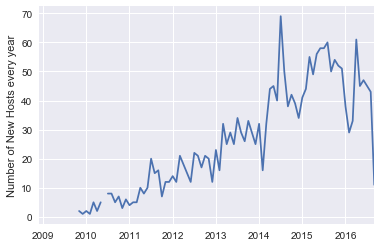

In [17]:
# Increase in popularity of Airbnb app in Boston city

# Converting string to datetime format
listingsData['host_since'] = pd.to_datetime(listingsData['host_since'])

# Finding unique hosts who joined Airbnb based on 'host_since' and 'join_date'
newDF = {}
hosts = listingsData.groupby('host_id')
for level,value in hosts:
    host_since = value['host_since'].values[0]
    if host_since in newDF:
        newDF[host_since] += 1
    else:
        newDF[host_since] = 1

join_dates = pd.Series(newDF)
join_dates = join_dates.drop(join_dates.index[[0]])

# for better visualization, aggregate time series per month, to get no. of new users per every month
join_dates = join_dates.resample("M").sum()
join_dates.plot()
plt.ylabel('Number of New Hosts every year')

In [18]:
# Replacing ',' in price with '.'
if listingsData.price.dtype != np.float64:
    listingsData.price= listingsData.price.map(lambda p : float(p[1:-3].replace(',','')))

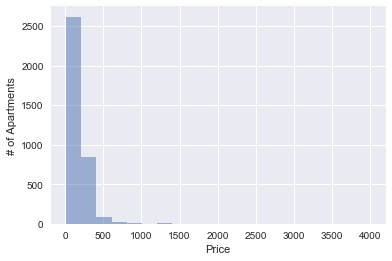

In [20]:
# Price Distribution

#Plotting our analysis

#PLotting a histogram showing the number of listings vs price
pricePlot= listingsData.price.dropna()
plt.hist(pricePlot, bins=20, alpha=0.5);
plt.xlabel('Price');
plt.ylabel('# of Apartments');

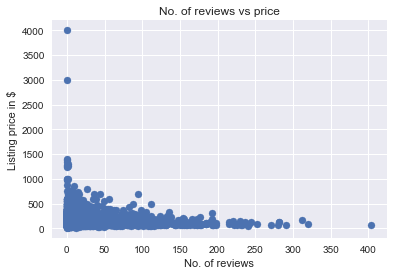

In [11]:
# Plotting a scatter plot to display number of reviews based on the listing price
plt.scatter(listingsData['number_of_reviews'],listingsData['price'])
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')

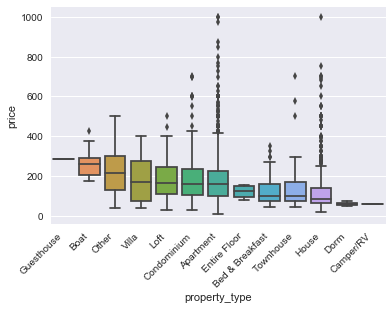

In [12]:
# Variations in Price based on Apartment Type

# Defining sort order for plotting box plot by grouping data based on property_type and average prices
sortOrder = listingsData.groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

# Plotting box plot to see prices for the different property types
# Using 'query' parameter to take listings having price lesser than 1000 to get a better plot
sns.boxplot(y='price', x='property_type', data=listingsData.query('price <= 1000'), order=sortOrder)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

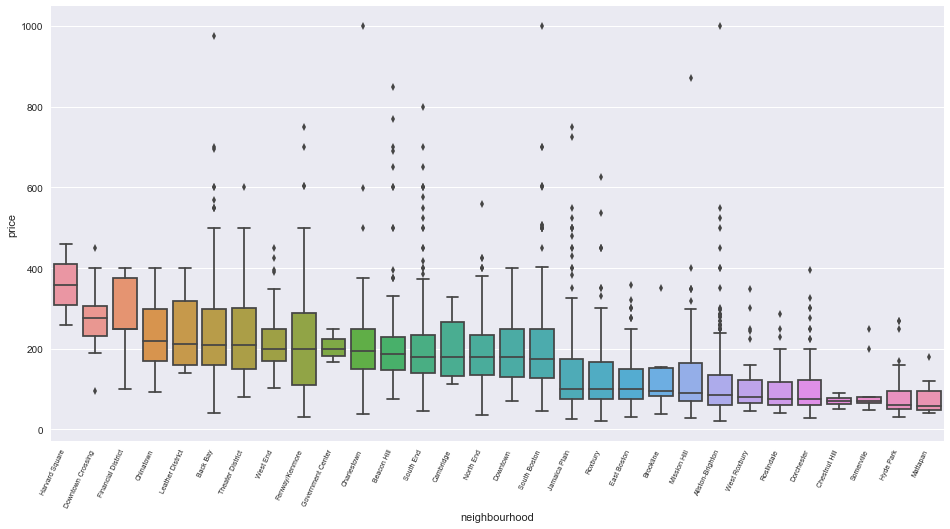

In [14]:
# Variations in price based on neighborhood

# Defining sort order for plotting box plot by grouping data based on property_type and average prices
sortOrder = listingsData.groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

# Plotting box plot to see prices for the different property types
# Using 'query' parameter to take listings having price lesser than 1000 to get a better plot
plt.figure(figsize = (16, 8))
sns.boxplot(y='price', x='neighbourhood', data=listingsData.query('price <= 1000'), 
            order=sortOrder)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right', fontsize=7)
plt.show()